Implementations

In [1]:
from implementations import *
from helpers import *
import matplotlib.pyplot as plt
import numpy as np
from functions import *

# 1- Load data

In [2]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data('dataset_to_release/', sub_sample=False)

In [36]:
print('Shapes of x_train :', x_train.shape)
print('Shapes of y_train :', y_train.shape)
print('Shapes of x_test :', x_test.shape)

Shapes of x_train : (328135, 321)
Shapes of y_train : (328135,)
Shapes of x_test : (109379, 321)


# 2- Clean data

(328135, 321)


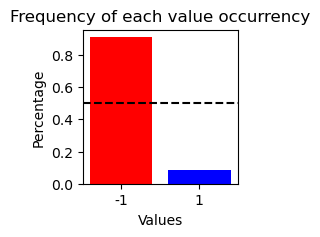

(78135, 321)


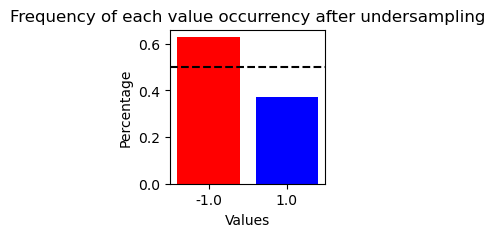

(109379, 312)
(312,)


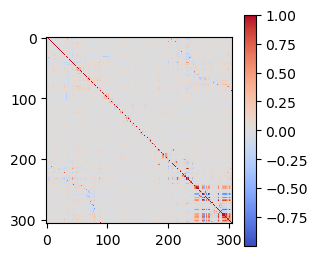

(78135, 264)


In [45]:
#Looking for duplicata
unq, count = np.unique(x_train, axis=0, return_counts=True)

unq[count].shape

#No duplicates but still important to check  

#Shuffle
shuffler = np.random.permutation(len(x_train))

x_train1 = x_train[shuffler]
y_train1 = y_train[shuffler]
print(x_train1.shape)

#Balancy of dataset
unique_values, counts = np.unique(y_train1, return_counts=True)


freqs = counts/len(y_train1)

# Create bar chart
labels = unique_values.astype(str)

std_errors = np.sqrt(freqs*(1-freqs)/len(y_train1))

expected_frequency = 1/len(np.unique(y_train1))

plt.figure(figsize = (2,2))
plt.bar(labels, freqs, color=['red' if val == -1 else 'blue' for val in unique_values])#, yerr = std_errors*1.96)
#yerr doesnt work, might have to check why and how to fix it
plt.axhline(expected_frequency,color='black',linestyle='--')
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Frequency of each value occurrency') 
plt.show()

#Random undersampling
unbalanced_dataset = np.concatenate((y_train1[:, np.newaxis], x_train1), axis = 1)

indices_to_delete = np.where(unbalanced_dataset[:, 0] == -1)[0]

random_indices = np.random.choice(indices_to_delete, 250000, replace=False) #on en degage beaucoup qd meme 

# Delete the selected rows
cleaned_data = np.delete(unbalanced_dataset, random_indices, axis=0)

y_train1 = cleaned_data[:, 0]
x_train1 = cleaned_data[:, 1:]
print(x_train1.shape)

#New balance
unique_values2, counts2 = np.unique(y_train1, return_counts=True)


freqs2 = counts2/len(y_train1)
#mean2 = np.mean(y_train_cleaned)

# Create bar chart
labels2 = unique_values2.astype(str)

std_errors2 = np.sqrt(freqs2*(1-freqs2)/len(y_train1))
#confidence_interval = [(mean2-std_errors2), (mean2+std_errors2)]

expected_frequency2 = 1/len(np.unique(y_train1))


plt.figure(figsize = (2,2))
plt.bar(labels2, freqs2, color=['red' if val == -1 else 'blue' for val in unique_values])#yerr = confidence_interval)
#yerr doesnt work, might have to check why and how to fix it
plt.axhline(expected_frequency2,color='black',linestyle='--')
plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Frequency of each value occurrency after undersampling') 
plt.show()


#premiere colonne remplie de Nan (supprimer d autres des premieres colonnes)
x_train1 = x_train1[:,9:]
x_test1 = x_test[:,9:]

#remplacer Nan par mediane (estce qu on a le droit de faire ca dans xtest? estce que cest une bonne idee ?)
x_train1=nan_to_median(x_train1)
x_test1=nan_to_median(x_test1)

#standardization of test
x_test1, _ = standardize_(x_test1)

#enlever les colonnes qui ont une std nulle
x_train1, col_to_keep=remove_zero_std_columns(x_train1)
print(x_test1.shape)
print(col_to_keep.shape)
x_test1= x_test1[:, col_to_keep]

#enlever les colonnes avec trop grande correlation
x_train1, col_to_delete=remove_high_correlation_feature(x_train1)
x_test1= np.delete(x_test1, col_to_delete, axis = 1)

#enlever les lignes de outliers
#x_train1, rows_to_keep =remove_outlier_rows(x_train1)

print(x_train1.shape)
#remplacer les outliers dans les colonnes qu'il reste avec la medianne aussi (le faire pour x_test?)
#x_train1=replace_remaining_outlier_values(x_train1)
#x_test1 = replace_remaining_outlier_values(x_test1)

Correlation Matrix

# 3- Split data

In [31]:
x_tr, y_tr, x_te, y_te = split_data(x_train1, y_train1)

# 4- First step w

### a) Least Squares

In [ ]:
'''
w_initial, loss = least_squares(y_train, x_train_final)
'''

### b) Ridge Regression

In [ ]:
'''
lambda_ = 0.1
w_initial, loss = ridge_regression(y_train, new_data, lambda_)
'''

### c) Looking for good hyperparameters  lambda_ for ridge regression

In [9]:
lambdas = np.linspace(0,0.5,50)
weights = []
losses_te = []

for lambda_ in lambdas:
    w,_ = ridge_regression(y_tr, x_tr, lambda_)
    weights.append(w)
    loss = compute_loss(y_te, x_te, w)
    losses_te.append(loss)

Smallest loss :  0.16701787935505852
Best lambda :  0.5


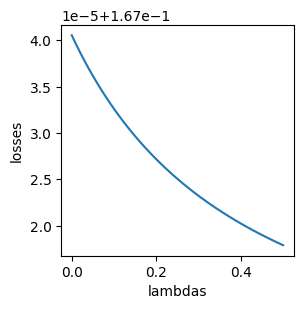

In [10]:
best_index = losses_te.index(min(losses_te))
print('Smallest loss : ',losses_te[best_index])
print('Best lambda : ',lambdas[best_index])
plt.figure(figsize = (3,3))
plt.xlabel('lambdas')
plt.ylabel('losses')
plt.plot(lambdas, losses_te)
plt.show()

In [11]:
w_initial = weights[best_index]

# 4- Gradient descent

### a) With Logistic Regression

In [ ]:
'''
nb_steps = 150
gamma = 0.01

for i in range(nb_steps):
    w_final, loss= logistic_regression(y_train, x_train_final, w_initial, gamma)
'''

### b) With Regularized Logistic Regression

In [ ]:
'''
nb_steps = 150
gamma = 0.01

for i in range(nb_steps):
    w_final, loss= reg_logistic_regression(y_train, new_data, w_initial, gamma, lambda_)
'''

### c) With search of best hyperprameters lambda and gamma for ridge regression AND regularized logistic regression

In [32]:
nb_steps = 20
lambdas = np.linspace(0,0.4,10)
gammas = np.linspace(0,1,10)
weights = np.zeros((len(lambdas),len(gammas), x_tr.shape[1]))
losses_te = np.zeros((len(lambdas),len(gammas)))

for i, lambda_ in enumerate(lambdas):
    
    for j, gamma in enumerate(gammas):
        
        w, _ = ridge_regression(y_tr, x_tr, lambda_)

        for step in range(nb_steps):

            w, loss = reg_logistic_regression(y_tr, x_tr, w, gamma, lambda_)

        weights[i,j] = w
        loss_te = compute_loss(y_te, x_te, w)
        losses_te[i][j] = loss_te           

In [33]:
best_index = np.unravel_index(np.argmin(losses_te), losses_te.shape)
row_index, col_index = best_index
best_weight = weights[row_index][col_index]
print('Best lambda : ', lambdas[row_index])
print('Best gamma : ', gammas[col_index])
w_final = best_weight

Best lambda :  0.0
Best gamma :  0.1111111111111111


In [63]:
w, _ = ridge_regression(y_tr, x_tr, 0.0444)
w_final, loss = reg_logistic_regression(y_tr, x_tr, w, 0.44, 0.044)

# 5- Test

Finding y predicted with x_test and w

In [34]:
#y_pred_proba has the proba of each y to be 1 or -1
y_pred_proba = sigmoid (np.dot(x_test1, w_final))

#If proba > 0.5, y becomes 1, else -1
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred[y_pred == 0] = -1

# 6- Creating the submission file

In [35]:
name = 'test_7.csv '
create_csv_submission(test_ids, y_pred, name)

----

### idees
- faire extension polynomiale (si on enleve bcp de colonnes grace aux outliers ca prend peutetre pas trop de temps)
- sortir les outliers du dataset
- enlever les colonnes avec trop de nan ?

### Fonctions utiles pour améliorer le modèle

In [38]:
#fonctions utiles pour améliorer le modèle
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly=np.zeros((x.shape[0], degree+1))
    for i in range (x.shape[0]):
        for j in range (degree+1):
            poly[i, j]=x[i]**j
    return poly